Rata-rata Durasi Olahraga: 33.3 menit
Rata-rata Konsumsi Air: 2.4 liter
Hari Khusus: Rabu
Korelasi antara Langkah dan Produktivitas: 0.90 (hubungan searah)
     Hari  Langkah  Kalori Terbakar  Jam Tidur  Produktivitas (%)  \
0   Senin     4000              200          6                 70   
1  Selasa     7500              350          7                 80   
2    Rabu     6000              300          8                 75   
3   Kamis     8000              400          6                 85   
4   Jumat     5000              250          5                 65   
5   Sabtu     7000              320          7                 78   

   Durasi Olahraga (menit)  Konsumsi Air (liter)  Waktu Layar (jam)  \
0                       20                   2.0                  4   
1                       40                   2.5                  5   
2                       30                   2.0                  6   
3                       50                   3.0                  3   
4    

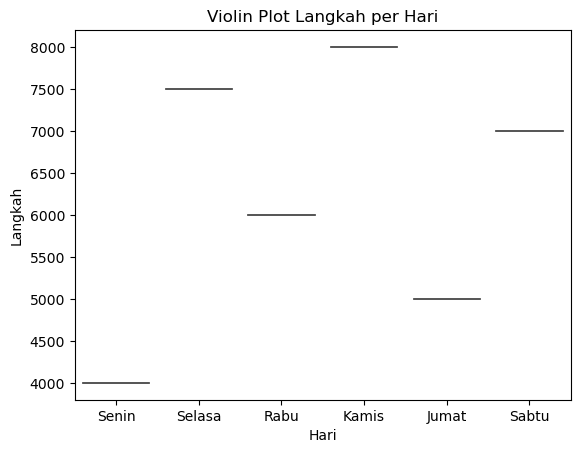

In [ ]:
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Aktivitas Harian (Hari Keenam Ditambahkan)
data_aktivitas = {
    'Hari': ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'],
    'Langkah': [4000, 7500, 6000, 8000, 5000, 7000],
    'Kalori Terbakar': [200, 350, 300, 400, 250, 320],
    'Jam Tidur': [6, 7, 8, 6, 5, 7],
    'Produktivitas (%)': [70, 80, 75, 85, 65, 78],
    'Durasi Olahraga (menit)': [20, 40, 30, 50, 25, 35],
    'Konsumsi Air (liter)': [2.0, 2.5, 2.0, 3.0, 2.2, 2.7],
    'Waktu Layar (jam)': [4, 5, 6, 3, 5, 4]
}

df_aktivitas = pd.DataFrame(data_aktivitas)

#Rata-rata Durasi Olahraga
olahraga = df_aktivitas['Durasi Olahraga (menit)'].mean()
print(f"Rata-rata Durasi Olahraga: {olahraga:.1f} menit")

#Rata-rata Konsumsi Air
air = df_aktivitas['Konsumsi Air (liter)'] .mean()
print(f"Rata-rata Konsumsi Air: {air:.1f} liter")

#Identifikasi Hari Khusus - Waktu Layer Terlama
layar = df_aktivitas['Waktu Layar (jam)'].idxmax()
hari_khusus = df_aktivitas.loc[layar, 'Hari']
print(f"Hari Khusus: {hari_khusus}")

#Korelasi Antara Langkah dan Produktivitas
langkah = df_aktivitas['Langkah']
produktivitas = df_aktivitas['Produktivitas (%)']
korelasi = stat.pearsonr(langkah, produktivitas)

if korelasi[0] > 0:
    print(f"Korelasi antara Langkah dan Produktivitas: {korelasi[0]:.2f} (hubungan searah)")
else:
    print(f"Korelasi antara Langkah dan Produktivitas: {korelasi[0]:.2f} (hubungan sebalik)")

#Total Aktivitas permasing masing hari
df_aktivitas['Total Aktivitas'] =  df_aktivitas['Langkah'] + df_aktivitas['Kalori Terbakar'] + df_aktivitas['Jam Tidur'] + df_aktivitas['Produktivitas (%)']
print(df_aktivitas)

# Mengambil hanya kolom numerik untuk analisis korelasi
df_numerik = df_aktivitas.select_dtypes(include=['number'])

# Akumulasi visual melalui heatmap
# Heatmap berguna ketika kita ingin memvisualisasikan korelasi antar variabel secara langsung. 
# Biasanya digunakan untuk melihat data dalam bentuk matriks dan mengidentifikasi pola atau
# hubungan yang mungkin tidak terlihat secara langsung.
# sns.heatmap(df_numerik.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Aktivitas Harian')
#Pairplot digunakan untuk menggali hubungan antar variabel dalam dataset. 
#Ini membantu kita untuk melihat pola hubungan antara dua variabel yang saling berinteraksi
sns.pairplot(df_numerik)
plt.title('Pairplot Aktivitas Harian')

#Violin Plot memberikan informasi tentang distribusi dan penyebaran data, termasuk informasi tentang keberadaan outlier dan simpangan data.
sns.violinplot(x=df_aktivitas['Hari'], y=df_aktivitas['Langkah'], data=df_aktivitas)
plt.title("Violin Plot Langkah per Hari")


plt.show() 
